# 파이토치 CIFAR10 모델

### modules import

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### GPU 설정 확인

In [2]:
torch.cuda.is_available() # GPU가 사용가능한지

True

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [5]:
device

device(type='cuda')

### 전처리 설정

In [10]:
transform = transforms.Compose([transforms.ToTensor(), # 데이터 타입을 Tensor 형태로 변경
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # -1 ~ 1 값으로 normalized

### 데이터 로드 및 확인

In [15]:
trainset = torchvision.datasets.CIFAR10(root='/data',
                                       train=True,
                                        download=True,                                    
                                       transform=transform)

testset = torchvision.datasets.CIFAR10(root='/data',
                                      train=False,
                                      download=True,
                                       transform=transform)

Files already downloaded and verified


In [17]:
train_loader = DataLoader(trainset,
                          batch_size=4,
                         shuffle=True,
                         num_workers=2)

test_loader = DataLoader(testset,
                          batch_size=4,
                         shuffle=True,
                         num_workers=2)

In [18]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

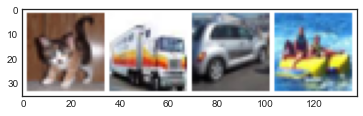

	dog 	truck 	car 	ship


In [45]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalized
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, padding=2, pad_value=1))
print(' '.join('\t{}'.format(classes[labels[j]]) for j in range(4)))

## 신경망 구성

In [38]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6 , 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [39]:
net = Net().to(device)

## 손실함수와 옵티마이저

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 모델 학습

In [41]:
for epoch in range(2):
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print("Epoch: {}, Batch: {}, Loss: {}".format(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

C:\Users\hanao\anaconda3\envs\P2E\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1, Batch: 2000, Loss: 2.1952696633934976
Epoch: 1, Batch: 4000, Loss: 1.8939562184512615
Epoch: 1, Batch: 6000, Loss: 1.6871845026016234
Epoch: 1, Batch: 8000, Loss: 1.592217730090022
Epoch: 1, Batch: 10000, Loss: 1.522739791482687
Epoch: 1, Batch: 12000, Loss: 1.4586636060923337
Epoch: 2, Batch: 2000, Loss: 1.4160109499394893
Epoch: 2, Batch: 4000, Loss: 1.4040303445830942
Epoch: 2, Batch: 6000, Loss: 1.3571943447217345
Epoch: 2, Batch: 8000, Loss: 1.354036135800183
Epoch: 2, Batch: 10000, Loss: 1.3246870877295733
Epoch: 2, Batch: 12000, Loss: 1.297827361509204


## 모델의 저장 및 로드

In [42]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

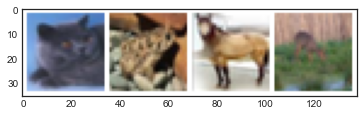

	cat 	frog 	horse 	deer


In [44]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, padding=2, pad_value=1))
print(' '.join('\t{}'.format(classes[labels[j]]) for j in range(4)))